In [ ]:
# Inatalación, es necesario correr esta celda, de lo contrario el código no funcionara.:
! pip install pyomo
! apt-get update
! apt-get install -y glpk-utils




Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,628 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [75.2 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,604 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/mai

# Actividad en clase
1. Crear función objetivo
2. Crear restricciones
3. Optimizar el modelo
4. Reportar resultados y dar conclusiones.

Complete el siguiente código.
Para completarlo, lea los comentarios del código, los cuales le dirán lo que tiene que completar.

In [ ]:
# Importamos las bibliotecas necesarias
from pyomo.environ import *

# Creamos el modelo
model = ConcreteModel()

# Definimos las variables de decisión
model.x_1 = Var(within=NonNegativeReals) # Ejemplo
model.x_2 = Var(within=NonNegativeReals)


In [ ]:
# Función objetivo
def objetivo(model):
    return 5*model.x_1 + 4*model.x_2

model.obj = Objective(expr=objetivo, sense=maximize)


In [ ]:

# Definimos las restricciones
# Completar restricciones
model.con1 = Constraint(expr= model.x_1 + model.x_2 <= 5) #
model.con2 = Constraint(expr= 10*model.x_1 + 6*model.x_2 <= 45) #




In [ ]:
# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 23.75
  Upper bound: 23.75
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 2
  Number of nonzeros: 4
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.017073631286621094
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

In [ ]:
# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de x_1: {model.x_1()}")
print(f"Valor óptimo de x_2: {model.x_2()}")

print(f"Valor óptimo de Z: {model.obj()}")


Valor óptimo de x_1: 3.75
Valor óptimo de x_2: 1.25
Valor óptimo de Z: 23.75


Agregamos una nueva restricción, para acotar el problema.

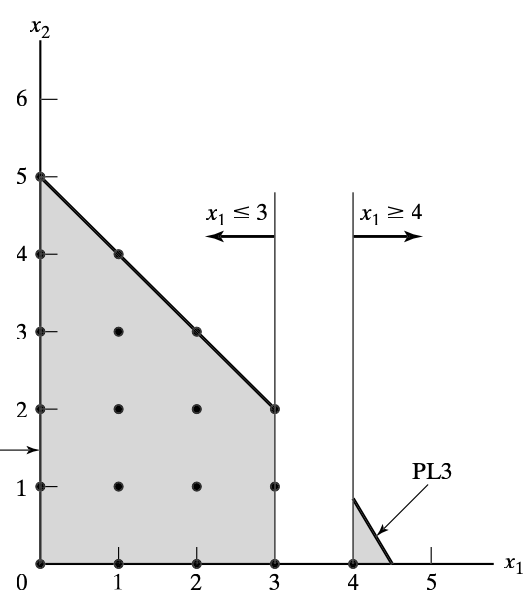

RESTRICCIÓN DONDE $x_1 \leq 3$

In [ ]:
model.con3 = Constraint(expr= model.x_1 <= 3) #


In [ ]:
# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')
# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de x_1: {model.x_1()}")
print(f"Valor óptimo de x_2: {model.x_2()}")

print(f"Valor óptimo de Z: {model.obj()}")

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 23.0
  Upper bound: 23.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Number of nonzeros: 5
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0036284923553466797
# ----------------------------------------------------------
#   Solution Information
# -------------------------------------

OPTIMIZANDO CON OTRA RESTRICCIÓN
$x_1 \geq 4$

In [ ]:
model.con3 = Constraint(expr= model.x_1 >= 4) #


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [ ]:
# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')
# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de x_1: {model.x_1()}")
print(f"Valor óptimo de x_2: {model.x_2()}")

print(f"Valor óptimo de Z: {model.obj()}")

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 23.3333333333333
  Upper bound: 23.3333333333333
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Number of nonzeros: 5
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004116058349609375
# ----------------------------------------------------------
#   Solution Information
# --------------

# Algoritmo plano cortate

$$
\text{Max } Z = 7x_1 + 10x_2
$$

\begin{align*}
    -x_1 + 3x_2 &\leq 6 \\
    7x_1 + x_2 &\leq 35 \\
    x_1, x_2 &\geq 0 \text{ y enteras}
\end{align*}


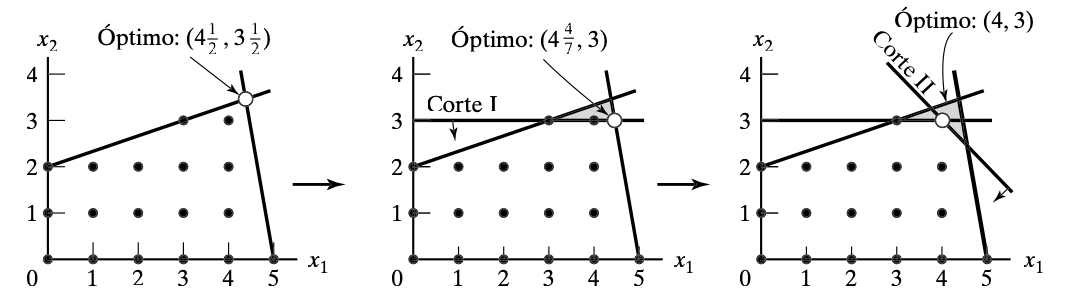

# Solucionarlo directamente con pyomo

In [ ]:

# Creamos el modelo
model = ConcreteModel()

# Definimos las variables de decisión
model.x_1 = Var(within=NonNegativeIntegers) # Ejemplo
model.x_2 = Var(within=NonNegativeIntegers)

# Función objetivo
def objetivo(model):
    return 5*model.x_1 + 4*model.x_2

model.obj = Objective(expr=objetivo, sense=maximize)

# Definimos las restricciones
# Completar restricciones
model.con1 = Constraint(expr= model.x_1 + model.x_2 <= 5) #
model.con2 = Constraint(expr= 10*model.x_1 + 6*model.x_2 <= 45) #



# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')
# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de x_1: {model.x_1()}")
print(f"Valor óptimo de x_2: {model.x_2()}")

print(f"Valor óptimo de Z: {model.obj()}")

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 23.0
  Upper bound: 23.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 2
  Number of nonzeros: 4
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 5
      Number of created subproblems: 5
  Error rc: 0
  Time: 0.0156557559967041
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------